In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

The goal of this notebook is to write algorithms for different linear regressions   
1. Linear Regression - OLS
2. Ridge Regression
3. Lasso Regression

Goal: Build a multiple linear regression model to predict the target_deathrate  
Implement k-fold (k=10) cross validation  
Data Description: https://data.world/nrippner/cancer-trials  


In [2]:
os.chdir('c:/Users/Siddharth/Desktop/python/exercises-linear-regression-exercise-1/')

In [3]:
os.listdir()

['data', 'datapackage.json', 'original']

In [4]:
file = open('datapackage.json')
z = file.readline()

In [5]:
dat_2 = pd.read_csv('data/cancer_reg.csv')

In [6]:
dat_2

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [7]:
# train-test 80:10 split
# dropping irrelevant columns
l = len(dat_2)
dat_3 = dat_2.drop(columns=[
    'pctotherrace', 'pctmarriedhouseholds', 'pctprivatecoverage',
    'pctbachdeg25_over', 'binnedinc', 'geography', 'pctblack', 'pctwhite',
    'pctasian', 'pctsomecol18_24',
    'pctemployed16_over', 'pctprivatecoveragealone', 'percentmarried',
    'pcths25_over', 'pcths18_24', 'birthrate', 'medianage'
])
dat_3['avgdeathsperyear'] = dat_3['avgdeathsperyear']/dat_3['popest2015']
dat_3['avganncount'] = dat_3['avganncount']/dat_3['popest2015']
train = dat_3.iloc[:int(l * 0.80)]
test = dat_3.iloc[int(l * 0.80):]
train_y = train['target_deathrate']
train_x = train.drop(columns=[
    'target_deathrate'
],
                     axis=1)
test_y = test['target_deathrate']
test_x = test.drop(columns=[
    'target_deathrate'
],
                   axis=1)

In [8]:
# remove nans
train_x.isna().sum()

avganncount               0
avgdeathsperyear          0
incidencerate             0
medincome                 0
popest2015                0
povertypercent            0
studypercap               0
medianagemale             0
medianagefemale           0
pctnohs18_24              0
pctbachdeg18_24           0
pctunemployed16_over      0
pctempprivcoverage        0
pctpubliccoverage         0
pctpubliccoveragealone    0
dtype: int64

In [9]:
from sklearn import linear_model

In [60]:
# OLS

model = linear_model.LinearRegression()
model.fit(train_x, train_y)
predicted_values = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
print(f'RMSE is {rmse} for linear regression')
print(f'R-squared is {r2_score(test_y, predicted_values)} for linear regression')

RMSE is 15.717912765641126 for linear regression
R-squared is 0.7086719312805556 for linear regression


In [10]:
# OLS on complete dataset
model = linear_model.LinearRegression()
model.fit(dat_3.drop(columns=['target_deathrate']), dat_3['target_deathrate'])
predicted_values = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
print(f'RMSE is {rmse} for linear regression')
print(f'R-squared is {r2_score(test_y, predicted_values)} for linear regression')

RMSE is 15.156061764518217 for linear regression
R-squared is 0.7291272514807522 for linear regression


In [11]:
# Ridge Regression

model = linear_model.Ridge(alpha=1)
model.fit(train_x, train_y)
predicted_values = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
print(f'RMSE is {np.round(rmse, decimals=5)} for Ridge regression')
print(f'R-squared is {np.round(model.score(test_x,test_y), decimals=6)} for Ridge regression')

RMSE is 21.19537 for Ridge regression
R-squared is 0.470245 for Ridge regression


In [12]:
# SGD

# model = linear_model.lasso_path(train_x, train_y)
model = linear_model.SGDRegressor(early_stopping=True)
model.fit(train_x, train_y)
predicted_values = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
print(f'RMSE is {rmse} for linear regression-SGD')
print(f'R-squared is {np.round(model.score(test_x,test_y), decimals=6)} for linear regression-SGD')

RMSE is 1.9279902637578957e+19 for linear regression-SGD
R-squared is -4.383310687778616e+35 for linear regression-SGD


In [13]:
# Bayesian Ridge

model = linear_model.BayesianRidge()
model.fit(train_x, train_y)
predicted_values = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
print(f'RMSE is {rmse} for linear regression')
print(f'R-squared is {r2_score(test_y, predicted_values)} for Bayesian Ridge regression')

RMSE is 21.17578107144584 for linear regression
R-squared is 0.4712243373006888 for Bayesian Ridge regression


In [14]:
# Lasso

model = linear_model.Lasso(alpha=0.4)
model.fit(train_x, train_y)
predicted_values = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
print(f'RMSE is {rmse} for linear regression')
print(f'R-squared is {r2_score(test_y, predicted_values)} for Lasso regression')

RMSE is 21.170360199311524 for linear regression
R-squared is 0.4714950294042556 for Lasso regression


In [15]:
# Ridge CV

model = linear_model.RidgeCV()
model.fit(train_x, train_y)
predicted_values = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
print(f'RMSE is {rmse} for linear regression')
print(f'R-squared is {r2_score(test_y, predicted_values)} for RidgeCV regression')
model

RMSE is 24.389200060419824 for linear regression
R-squared is 0.2985645776246345 for RidgeCV regression


RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [40]:
# statsmodels
import statsmodels.api as sm
lr = sm.OLS(dat_3['target_deathrate'], dat_3.drop(columns=['target_deathrate']), hasconst=False)
result = lr.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       target_deathrate   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          3.368e+04
Date:                Sun, 22 Aug 2021   Prob (F-statistic):                        0.00
Time:                        19:06:02   Log-Likelihood:                         -12575.
No. Observations:                3047   AIC:                                  2.518e+04
Df Residuals:                    3034   BIC:                                  2.525e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
avganncount              -18.3324      2.702     -6.785      0.000     -23.630     -13.035
avgdeathsperyear        4.216e+04    783.596     53.808      0.000    4.06e+04    4.37e+04
incidencerate              0.1290      0.005     23.483      0.000       0.118       0.140
medincome                  0.0004   4.07e-05      9.957      0.000       0.000       0.000
popest2015             -4.687e-06   8.98e-07     -5.218      0.000   -6.45e-06   -2.93e-06
povertypercent             1.5362      0.082     18.736      0.000       1.375       1.697
studypercap               -0.0014      0.001     -2.619      0.009      -0.002      -0.000
pctnohs18_24               0.0313      0.038      0.821      0.412      -0.043       0.106
pctbachdeg18_24           -0.5964      0.074     -8.020      0.000      -0.742      -0.451
pctunemployed16_over       1.3693      0.114     11.980      0.000       1.145       1.593
pctempprivcoverage         0.5955      0.048     12.281      0.000       0.500       0.691
pctpubliccoverage         -3.3927      0.101    -33.628      0.000      -3.591      -3.195
pctpubliccoveragealone     3.7012      0.131     28.273      0.000       3.445       3.958
==============================================================================
Omnibus:                      270.546   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1113.438
Skew:                           0.352   Prob(JB):                    1.66e-242
Kurtosis:                       5.877   Cond. No.                     9.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
result.resid

0       10.191439
1        3.014006
2       23.560694
3        4.081432
4       -6.202897
          ...    
3042    -3.208737
3043    -9.725868
3044   -10.007167
3045     4.350476
3046    75.700640
Length: 3047, dtype: float64

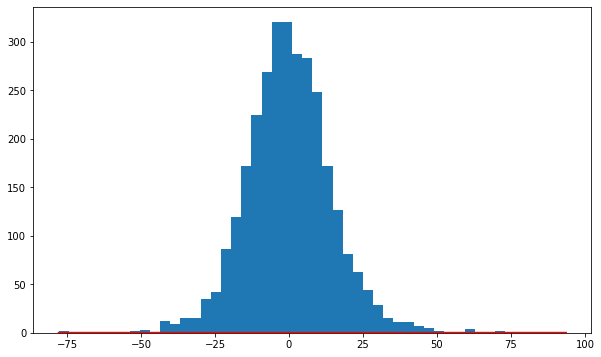

In [41]:
plt.figure(figsize=(10,6))
import scipy.stats as stats
mu = np.mean(result.resid)
sigma = np.std(result.resid)
pdf = stats.norm.pdf(sorted(result.resid), mu, sigma)
plt.hist(result.resid, bins=50)
plt.plot(sorted(result.resid), pdf, color='r', linewidth=2)
plt.show()

$\rightarrow$ The distribution of the residuals is not perfectly normal. There is a small number of outliers to the left

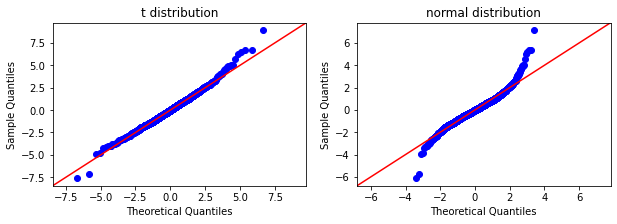

In [23]:
# QQplot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,3))
sm.qqplot(result.resid, stats.t, fit=True, line='45', ax = ax1)
ax1.set_title("t distribution")
sm.qqplot(result.resid, stats.norm, fit=True, line='45', ax=ax2)
ax2.set_title("normal distribution")
plt.show()

$\rightarrow$ The qqplots confirm that the residuals adhere more closely to the t- than normal distribution (fatter tails). A few prominent outliers are visible at the lower extreme.

c:\users\siddharth\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


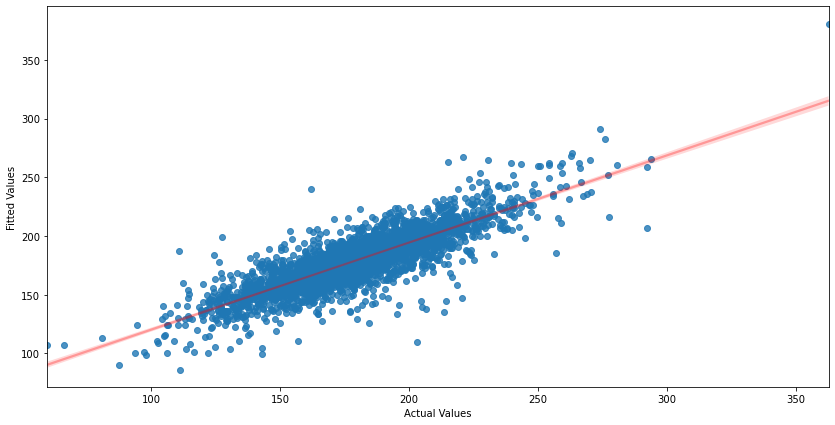

Pearson R:  (0.8422087369520849, 0.0)


In [42]:
# plot predicted vs actual
plt.figure(figsize=(14,7))
sns.regplot(dat_3['target_deathrate'], result.fittedvalues, line_kws={'color':'r', 'alpha':0.3})
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()
print("Pearson R: ", stats.pearsonr(result.fittedvalues, dat_3['target_deathrate']))

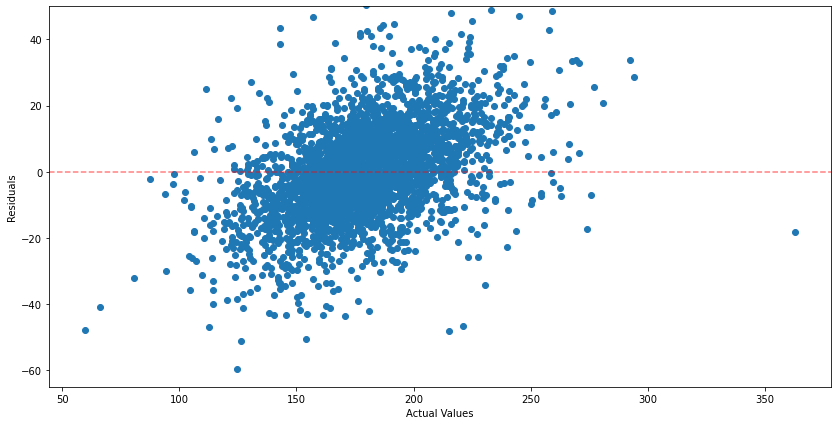

Pearson R: (0.47742898588450505, 2.6964160451518757e-173)


In [43]:
# plot actual values versus residuals
plt.figure(figsize=(14,7))
plt.scatter(y=result.resid, x=dat_3['target_deathrate'])
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.ylim(-65, 50)
plt.show()
print("Pearson R:", stats.pearsonr(dat_3['target_deathrate'], result.resid))

This chart suggests that the model tends to somewhat overshoot lower values, and undershoot higher ones. In other words, the error isn't entirely random. The model is moderately biased toward the mean.

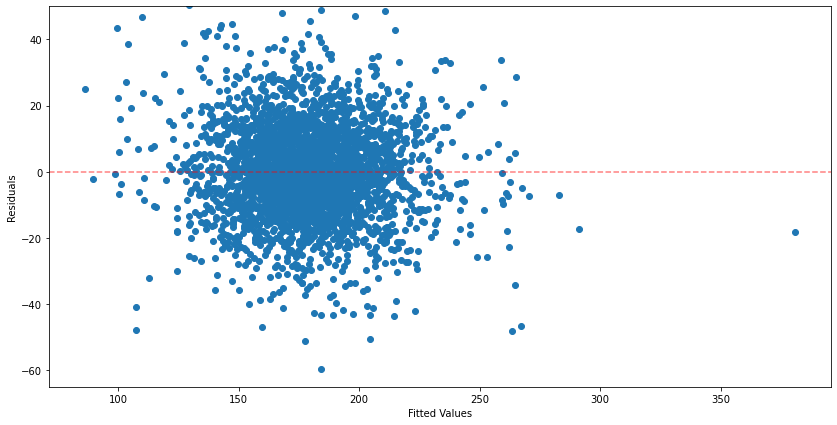

In [44]:
# plot actual values versus residuals
plt.figure(figsize=(14,7))
plt.scatter(y=result.resid, x=result.fittedvalues)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.ylim(-65, 50)
plt.show()

1. Multicollinearity does not appear to be present.
2. Parameters are statistically significant.
3. The residuals adhere more closely to a t- than a normal distribution -- larger excess kurtosis and fatter tails.
4. The fitted values tend to err in the negative direction (overestimate) actual values toward the lower extreme of the range, and the inverse for values toward the high end of the range.
5. The R^2 is 0.708, meaning that the model accounts for 71% of the total observed variance in the model.

**Variation Inflation Factor for multicollinearity detection**

In [34]:
# VIF for detecting multicollinearity. Variables with too high VIF have been removed and placed in dat_3 drop function
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
tt = dat_3.drop(columns=['target_deathrate'])
pd.DataFrame([[var, variance_inflation_factor(tt.values, tt.columns.get_loc(var))] for var in tt.columns],
             index=range(tt.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,avganncount,1.126797
1,avgdeathsperyear,55.017801
2,incidencerate,83.447927
3,medincome,66.701144
4,popest2015,1.296280
5,povertypercent,30.178681
6,studypercap,1.111586
7,medianagemale,490.152227
8,medianagefemale,642.943675
9,pctnohs18_24,8.200403


In [50]:
dat_4 = dat_3.drop(columns=[
    'pctempprivcoverage',
    'pctpubliccoveragealone'
])
train = dat_4
test = dat_4.iloc[int(l * 0.80):]
train_y = train['target_deathrate']
train_x = train.drop(columns=['target_deathrate'], axis=1)

In [51]:
pd.DataFrame([[var, variance_inflation_factor(train_x.values, train_x.columns.get_loc(var))] for var in train_x.columns],
             index=range(train_x.shape[1]), columns=['Variable', 'VIF'])

,Variable,VIF
0,avganncount,1.123613
1,avgdeathsperyear,37.600024
2,incidencerate,68.161613
3,medincome,27.840574
4,popest2015,1.261348
5,povertypercent,25.151052
6,studypercap,1.103852
7,pctnohs18_24,7.649013
8,pctbachdeg18_24,4.324764
9,pctunemployed16_over,12.599446
